# Implementasi PCA

In [3]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/njungger/dataset/main/IRIS.csv')
jumlah_baris = df.shape[0]
df.head(jumlah_baris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df_copy = df.copy()
df_copy.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df_copy = df_copy.replace('?',np.nan)

In [7]:
df_copy.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# features and target
X = df_copy[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df_copy['species']

In [10]:
# Normalisasi pada X
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Normalisasi pada y
label = LabelEncoder()
y = label.fit_transform(y)

In [11]:
# Menyimpan normalisasi ke file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Menyimpan normalisasi ke file
with open('label.pkl', 'wb') as file:
    pickle.dump(label, file)

In [12]:
# Membuat DataFrame dari X dan y menggunakan pandas
liat = pd.DataFrame(X, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
liat['target'] = y

# Menampilkan DataFrame yang digabungkan
liat.head(jumlah_baris)

,sepal_length,sepal_width,petal_length,petal_width,target
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


In [13]:
# Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

## membangun model KNN

In [14]:
# Membangun model KNN
knn = KNeighborsClassifier(n_neighbors=3)

# Melatih model dengan data latih
knn.fit(X_train, y_train)

# Memprediksi kelas target untuk data uji
y_prediksi_knn = knn.predict(X_test)

# Menghitung akurasi prediksi
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_prediksi_knn)))

Accuracy: 1.00


In [15]:
# Menyimpan model ke file
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn, file)

In [16]:
# Load model dari file
with open('knn_model.pkl', 'rb') as file:
    knn_loaded = pickle.load(file)

# Load normalisasi dari file
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)
with open('label.pkl', 'rb') as file:
    label = pickle.load(file)

# Buat data baru
data_baru = np.array([[5.1, 3.5, 1.4, 0.2]])

# Scaling data baru menggunakan skalar yang telah dilatih sebelumnya
data_baru_scaled = scaler.fit_transform(data_baru)

# Menggunakan model untuk melakukan prediksi pada data baru
y_pred = knn_loaded.predict(data_baru_scaled)
y_pred_scaled = label.inverse_transform(y_pred)

print(y_pred_scaled)

['Iris-setosa']


## Model KNN dengan PCA

In [17]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)

In [18]:
pca.get_covariance()

array([[ 0.05290845, -0.00454496,  0.05996621,  0.05982683],
       [-0.00454496,  0.03263959, -0.02271983, -0.02048285],
       [ 0.05996621, -0.02271983,  0.08943348,  0.09155279],
       [ 0.05982683, -0.02048285,  0.09155279,  0.1011136 ]])

In [19]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.84141901, 0.11732474, 0.03490564, 0.00635061])

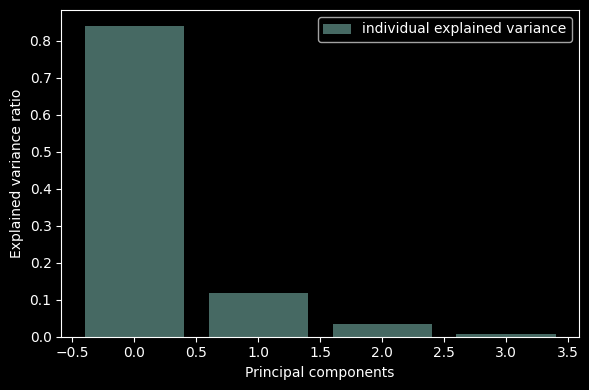

In [20]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [21]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)

In [22]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size = 0.3, random_state=42, stratify=y)

In [23]:
# Membangun model KNN dengan PCA
knn_pca = KNeighborsClassifier(n_neighbors=3)

# Melatih model dengan data latih
knn_pca.fit(X_train_new, y_train_new)

# Memprediksi kelas target untuk data uji
y_prediksi_knn_pca = knn_pca.predict(X_test_new)

# Menghitung akurasi prediksi
print('Accuracy: {:.2f}'.format(accuracy_score(y_test_new, y_prediksi_knn_pca)))

Accuracy: 0.93


<ipython-input-24-83cbfce838ff>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


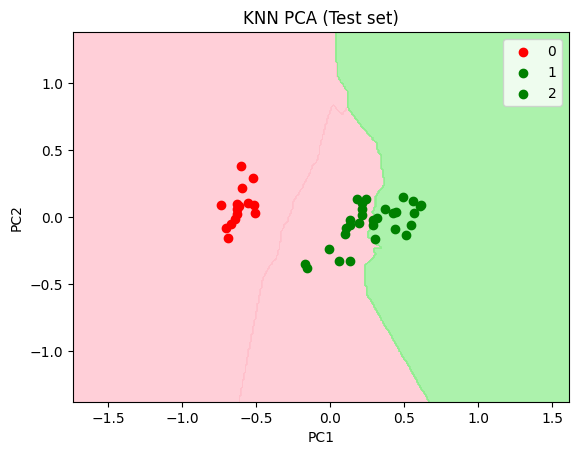

In [24]:
# Visualising the Test set results
classifier = knn_pca
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_new, y_test_new
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(),np.zeros((X1.shape[0],X1.shape[1])).ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN PCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()